Panas Explore


Load data.


In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Example

Why `df.explode()` is needed?

Here is a fake dataset of 3 job postings


In [2]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)
df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


if we wanted to analyze the skills in this, we'd need a minimum of 5 lines of codes to get the counts of skills


In [3]:
df_skills_list = df_skills.copy()

for row in df_skills_list.itertuples():
    for skill in row.job_skills:
        # For each unique skill (e.g., excel, sql, python, r, aws, airflow), a new column is created in df_skills_list with the skill name.
        df_skills_list[skill] = df_skills_list['job_skills'].apply(
            lambda x: skill in x)
        # Creates a boolean Series where True indicates the skill is present in the job_skills list for a given row, and False otherwise.
        df_skills_list[skill] = df_skills_list[skill].astype(int)

df_skills_list.loc['Total'] = df_skills_list.sum()

df_skills_list.iloc[:, 2:]

,excel,sql,python,r,aws,airflow
0,1,1,1,0,0,0
1,0,0,1,1,0,0
2,0,0,1,0,1,1
Total,1,1,3,1,1,1


In [4]:
# Here’s how you could achieve the same result more efficiently:
'''
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}
df_skills = pd.DataFrame(data)

# Explode the skills list and create binary columns
df_skills_list = df_skills.explode('job_skills')
df_skills_list = pd.get_dummies(df_skills_list, columns=['job_skills']).groupby('job_title_short').sum().reset_index()

# Add Total row
df_skills_list.loc['Total'] = df_skills_list.iloc[:, 1:].sum()
df_skills_list.iloc[:, 1:]  # Exclude job_title_short
'''

"\ndata = {\n    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],\n    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]\n}\ndf_skills = pd.DataFrame(data)\n\n# Explode the skills list and create binary columns\ndf_skills_list = df_skills.explode('job_skills')\ndf_skills_list = pd.get_dummies(df_skills_list, columns=['job_skills']).groupby('job_title_short').sum().reset_index()\n\n# Add Total row\ndf_skills_list.loc['Total'] = df_skills_list.iloc[:, 1:].sum()\ndf_skills_list.iloc[:, 1:]  # Exclude job_title_short\n"

However, exploding it out makes the data a lot easier to work with


In [5]:
df_exploded = df_skills.explode('job_skills')
df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


Key Details about `explode()`

- Purpose: Converts each element of a list-like object in a column into a separate row, replicating the other columns' values for each element.
- Input: A column containing list-like objects (e.g., lists, tuples, sets, or pandas Series).
- Output: A new DataFrame with the list-like elements expanded into individual rows.
- Introduced: In pandas version 0.25.0.
- Common Use Case: Preparing data for operations like grouping, counting, or creating binary matrices (as seen in your previous question).


Before `explode()`: The job_skills column contains lists of skills for each job title.

After `explode()`:

- Each skill in the `job_skills` lists is expanded into its own row.
- The corresponding `job_title_short` value is duplicated for each skill in the list.
- The original index (e.g., `0` for Data Analyst) is preserved unless `ignore_index = True` is specified.

Result: The DataFrame now has one row per skill, making it easier to analyze individual skills (e.g., count occurrences or create a binary matrix).


Now we can perform value_counts and even plot it


In [6]:
df_exploded.value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

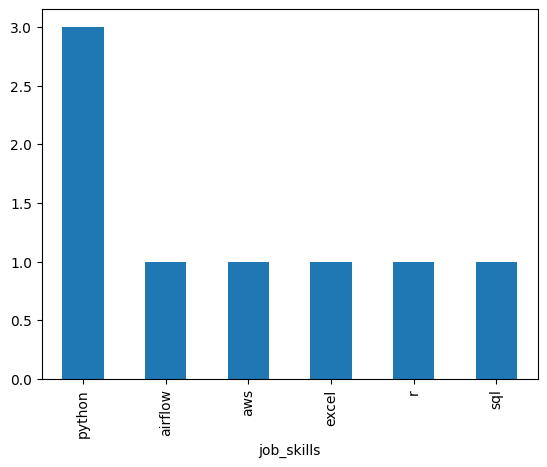

In [7]:
df_exploded.value_counts('job_skills').plot(kind='bar')

Notes

- `explode()` - transforms each element of a list-like to a row
- Expand list-like data within a DataFrame column into separate rows.
- Commonly used to split list data into individual rows for analysis (_hint_ _hint_) or when working with JSON data in a DataFrame.
  Example

Let's transform the list like elements in the `job_skills` column to a row using the `explode()` function. This will make it so each skill will have its own row and we'll save this into a new DataFrame called `df_exploded`.

In the last section we already prepared our data and we converted our `job_skills` column to a list.


In [ ]:
# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


Now we're going to apply the `explode()` function onto each skill and make each skill have its own row.


In [9]:
# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode('job_skills', ignore_index=True)

Let's look at our new column.


In [10]:
df_exploded['job_skills']

0                None
1                   r
2              python
3                 sql
4               nosql
              ...    
3777315         kafka
3777316    kubernetes
3777317        docker
3777318           aws
3777319          flow
Name: job_skills, Length: 3777320, dtype: object

And now let's visualize it by getting the `value_counts()` of each skill.


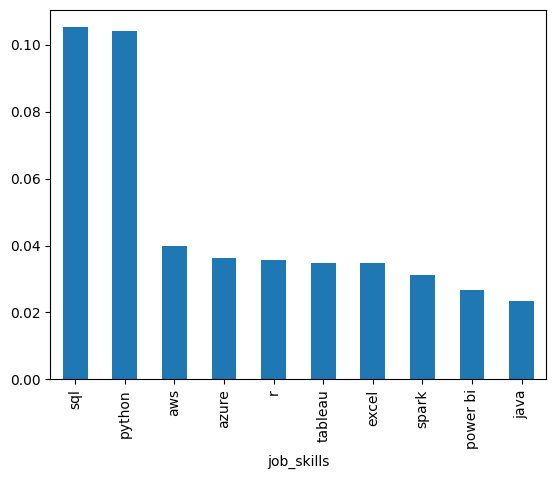

In [11]:
df_exploded['job_skills'].value_counts('job_skills').head(10).plot(kind='bar')

plt.show()

Calculate skill count


1. Then clean up the skills. We already dod this in our last


In [12]:

# Explode the job_skills column
df_skills = df_skills.explode('job_skills')

2. Now we'll calculate the skill count for each data job.


In [13]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_skills.groupby(
    ['job_skills', 'job_title_short']).size()  # .unstack(fill_value=0)

print('Type of skills_count:', type(skills_count))
skills_count.head(10)

Type of skills_count: <class 'pandas.core.series.Series'>


job_skills  job_title_short
airflow     Data Engineer      1
aws         Data Engineer      1
excel       Data Analyst       1
python      Data Analyst       1
            Data Engineer      1
            Data Scientist     1
r           Data Scientist     1
sql         Data Analyst       1
dtype: int64

3. We'll `reset_index` to transform skills_count from a Series to a DataFrame.


In [ ]:
# Name the count column as count
# we need to rename the main Series value to count
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


Name the count column as count
df_skills_count = skills_counts.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skills_count


4. We'll prep for plotting by the data getting in descending order.


In [15]:
df_skills_count.sort_values(by='skill_count', inplace=True, ascending=False)

df_skills_count.head(10)

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


5. Finally, we'll graph the top 10 skills using a bar chart.


In [16]:
job_title = 'Data Scientist'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(
    head_value)

df_skill_final

,job_skills,job_title_short,skill_count
5,python,Data Scientist,1
6,r,Data Scientist,1


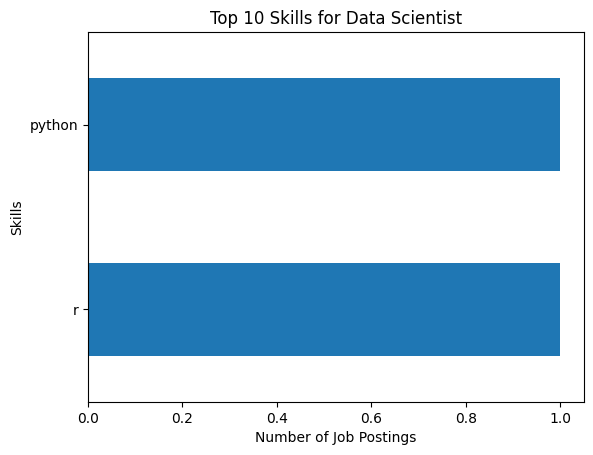

In [17]:
df_skill_final.plot(x='job_skills', y='skill_count', kind='barh', legend=False)

plt.xlabel('Number of Job Postings')
plt.ylabel('Skills')
plt.title(f'Top {head_value} Skills for {job_title}')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.legend().set_visible(False)
plt.show()